In [46]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [47]:
#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

In [48]:
#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
#validation libraries
from sklearn.model_selection import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics

In [50]:
%matplotlib inline

In [51]:
train_df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [52]:
# here's one sample
sample_dict = [
    {'label': 'house i would like', 'sqft':5000},
    {'label': 'house i would hate','sqft':500},
    {'label': 'house i live in', 'sqft':800}
]
pd.DataFrame(sample_dict)

,label,sqft
0,house i would like,5000
1,house i would hate,500
2,house i live in,800


In [53]:
train_df.shape

(1460, 81)

In [54]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [56]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [57]:
train_df['SalePrice'].head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [58]:
train_df[['SalePrice']].head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [59]:
train_df[['SalePrice','LotShape']].head(4)

,SalePrice,LotShape
0,208500,Reg
1,181500,Reg
2,223500,IR1
3,140000,IR1


In [60]:
train_df.iloc[range(3),]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [61]:
train_df[train_df['LotShape'].isin(['Reg','IR1'])].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [62]:
print('this many columns:%d ' % len(train_df.columns))
train_df.columns

this many columns:81 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
train_df.columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirsstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [64]:
train_df[train_df['Alley'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [65]:
train_df['Alley'].fillna(0, inplace=True)

In [66]:
na_totals = train_df.isnull().sum().sort_values(ascending=False)
na_totals[na_totals>0]

PoolQC          1453
MiscFeature     1406
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [67]:
train_df.fillna(0, inplace=True)

In [68]:
numeric_cols = [x for x in train_df.columns if ('Area' in x) | ('SF' in x)] + ['SalePrice','LotFrontage','MiscVal','EnclosedPorch','ThreeSsnPorch','ScreenPorch','OverallQual','OverallCond','YearBuilt']

for col in numeric_cols:
    train_df[col] = train_df[col].astype(float)
numeric_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'FirsstFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'LotFrontage',
 'MiscVal',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'OverallQual',
 'OverallCond',
 'YearBuilt']

In [70]:
categorical_cols = [x for x in train_df.columns if x not in numeric_cols]

for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
categorical_cols

['Id',
 'MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [71]:
train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x : np.log(x)) 

#Vectorized log function acting on a vector
# then assigning all the values at once
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

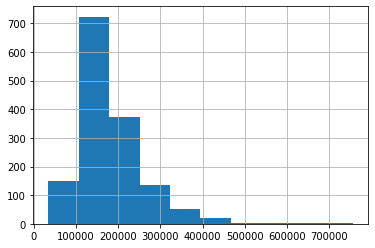

In [72]:
train_df['SalePrice'].hist()

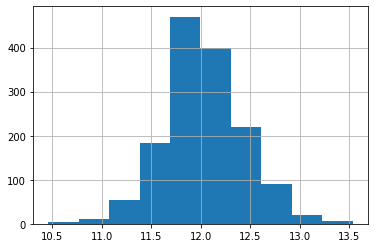

In [73]:
train_df['LogSalePrice'].hist()

In [79]:
# element wise function to transform
train_df['above_200k'] = train_df['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
train_df['above_200k'] = train_df['above_200k'].astype('category')

0    1
1    0
2    1
3    0
4    1
Name: above_200k, dtype: category
Categories (2, int64): [0, 1]

In [80]:
# manually assign the values to your new field, section by section
# with row filtering
train_df.loc[train_df['SalePrice']>200000,'above_200k'] = 1
train_df.loc[train_df['SalePrice']<=200000,'above_200k'] = 0
train_df['above_200k'] = train_df['above_200k'].astype('category')

In [81]:
train_df['LivArea_Total'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['PoolArea']
train_df[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()

,LivArea_Total,GrLivArea,GarageArea,PoolArea
0,2258.0,1710.0,548.0,0.0
1,1722.0,1262.0,460.0,0.0
2,2394.0,1786.0,608.0,0.0
3,2359.0,1717.0,642.0,0.0
4,3034.0,2198.0,836.0,0.0


In [82]:
## concatenating two different fields together in the same row
train_df['Lot_desc'] = train_df.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
train_df[['Lot_desc','MSZoning','LotShape']].head()

,Lot_desc,MSZoning,LotShape
0,RLReg,RL,Reg
1,RLReg,RL,Reg
2,RLIR1,RL,IR1
3,RLIR1,RL,IR1
4,RLIR1,RL,IR1


In [83]:
train_df['LotArea_norm'] = train_df['LotArea']

ss = StandardScaler()
mas = MaxAbsScaler()
qs = QuantileTransformer()

train_df['LotArea_norm'] = ss.fit_transform(train_df[['LotArea']])
train_df['LotArea_mas'] = mas.fit_transform(train_df[['LotArea']])
train_df['LotArea_qs'] = qs.fit_transform(train_df[['LotArea']])


train_df[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

,LotArea_norm,LotArea_mas,LotArea_qs,LotArea
0,-0.207142,0.039258,0.349349,8450.0
1,-0.091886,0.044600,0.525025,9600.0
2,0.073480,0.052266,0.720220,11250.0
3,-0.096897,0.044368,0.509667,9550.0
4,0.375148,0.066250,0.897123,14260.0


In [84]:
small_df = train_df[['MSZoning','SalePrice']].copy()
small_df['MSZoning'] = small_df['MSZoning'].astype('category')
small_df.head()

,MSZoning,SalePrice
0,RL,208500.0
1,RL,181500.0
2,RL,223500.0
3,RL,140000.0
4,RL,250000.0


In [85]:
pd.get_dummies(small_df).head(5)

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,208500.0,0,0,0,1,0
1,181500.0,0,0,0,1,0
2,223500.0,0,0,0,1,0
3,140000.0,0,0,0,1,0
4,250000.0,0,0,0,1,0


In [86]:
small_df = train_df[['MSSubClass','SalePrice']].copy()
small_df['MSSubClass'] = small_df['MSSubClass'].astype('category')
small_df.head()

,MSSubClass,SalePrice
0,60,208500.0
1,20,181500.0
2,60,223500.0
3,70,140000.0
4,60,250000.0


In [87]:
le = LabelEncoder()
trf_MSSubClass = le.fit_transform(small_df['MSSubClass'])
trf_MSSubClass

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [88]:
le.classes_

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

In [89]:
le.inverse_transform(trf_MSSubClass)

array([60, 20, 60, ..., 70, 20, 20], dtype=int64)

In [90]:
feature_cols = [col for col in train_df.columns if 'Price' not in col]

In [91]:
y = train_df['LogSalePrice']
X = train_df[feature_cols]
print(y.head(2),'\n\n', X.head(2))

0    12.247694
1    12.109011
Name: LogSalePrice, dtype: float64 

   Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0   8450.0   Pave     0      Reg   
1  2         20       RL         80.0   9600.0   Pave     0      Reg   

  LandContour Utilities  ... MoSold YrSold SaleType SaleCondition above_200k  \
0         Lvl    AllPub  ...      2   2008       WD        Normal          1   
1         Lvl    AllPub  ...      5   2007       WD        Normal          0   

  LivArea_Total Lot_desc  LotArea_norm  LotArea_mas  LotArea_qs  
0        2258.0    RLReg     -0.207142     0.039258    0.349349  
1        1722.0    RLReg     -0.091886     0.044600    0.525025  

[2 rows x 86 columns]


In [92]:
X_numerical = pd.get_dummies(X)
X_numerical.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Lot_desc_RHIR2,Lot_desc_RHReg,Lot_desc_RLIR1,Lot_desc_RLIR2,Lot_desc_RLIR3,Lot_desc_RLReg,Lot_desc_RMIR1,Lot_desc_RMIR2,Lot_desc_RMIR3,Lot_desc_RMReg
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,0,0,0,0,0,0
3,60.0,9550.0,7.0,5.0,1915.0,0.0,216.0,0.0,540.0,756.0,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
import patsy
formula = 'LogSalePrice ~ %s' % (' + '.join(feature_cols)) 
y, X = patsy.dmatrices(formula, train_df, return_type='dataframe')
print(y.head(2),'\n\n', X.head(2))

   LogSalePrice
0     12.247694
1     12.109011 

    Intercept  Id[T.2]  Id[T.3]  Id[T.4]  Id[T.5]  Id[T.6]  Id[T.7]  Id[T.8]  \
0        1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Id[T.9]  Id[T.10]  ...  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  \
0      0.0       0.0  ...         61.0            0.0            0.0   
1      0.0       0.0  ...          0.0            0.0            0.0   

   ScreenPorch  PoolArea  MiscVal  LivArea_Total  LotArea_norm  LotArea_mas  \
0          0.0       0.0      0.0         2258.0     -0.207142     0.039258   
1          0.0       0.0      0.0         1722.0     -0.091886     0.044600   

   LotArea_qs  
0    0.349349  
1    0.525025  

[2 rows x 1951 columns]


In [94]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 170
n_trn = len(y)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1290, 1951) (170, 1951) (1290, 1) (170, 1)


In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1168, 1951) (292, 1951) (1168, 1) (292, 1)


In [96]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lm.score(X_train,y_train)

1.0

In [98]:
lm.score(X_valid,y_valid)

0.7940882017209843

In [99]:
y_pred = lm.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.17376379517445184

In [100]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), cv=5,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [101]:
print(rdgCV.alpha_)

10.0


In [102]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_valid, y_valid)

0.8078607123286626

In [103]:
y_pred = rdg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.16785209489309902

In [104]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X,y)

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [105]:
rfr.score(X_valid,y_valid)

0.9865652965895048

In [106]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.04438464180235632

In [107]:
import patsy

train_df['above_200k'] = train_df['above_200k'].astype(float)
formula = 'above_200k ~ %s' % (' + '.join(feature_cols)) 
y_cls, X_cls = patsy.dmatrices(formula, train_df, return_type='dataframe')
print(y.head(2),'\n\n', X.head(2))


X_cls_train, X_cls_valid, y_cls_train, y_cls_valid = train_test_split(X_cls,y_cls, test_size=0.2)
print(X_cls_train.shape, X_cls_valid.shape, y_cls_train.shape, y_valid.shape)

   LogSalePrice
0     12.247694
1     12.109011 

    Intercept  Id[T.2]  Id[T.3]  Id[T.4]  Id[T.5]  Id[T.6]  Id[T.7]  Id[T.8]  \
0        1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Id[T.9]  Id[T.10]  ...  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  \
0      0.0       0.0  ...         61.0            0.0            0.0   
1      0.0       0.0  ...          0.0            0.0            0.0   

   ScreenPorch  PoolArea  MiscVal  LivArea_Total  LotArea_norm  LotArea_mas  \
0          0.0       0.0      0.0         2258.0     -0.207142     0.039258   
1          0.0       0.0      0.0         1722.0     -0.091886     0.044600   

   LotArea_qs  
0    0.349349  
1    0.525025  

[2 rows x 1951 columns]
(1168, 1951) (292, 1951) (1168, 1) (292, 1)


In [108]:
lgm = LogisticRegression()
lgm.fit(X_cls_train,y_cls_train)

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
lgm.score(X_cls_valid,y_cls_valid)

1.0

Confusion matrix, without normalization
[[203   0]
 [  0  89]]


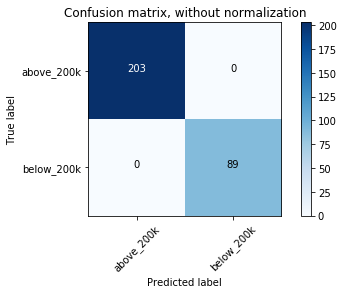

In [110]:
y_cls_pred = lgm.predict(X_cls_valid)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = metrics.confusion_matrix(y_cls_valid, y_cls_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['above_200k', 'below_200k'],
                      title='Confusion matrix, without normalization')

In [111]:
rfr = RandomForestRegressor(n_jobs=-1)

In [112]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train.LogSalePrice.ravel())
print(gs.best_params_, gs.best_score_)

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\

{'max_depth': 10, 'max_features': 0.5} 0.8870144583875526


In [113]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
rs = RandomizedSearchCV(cv=5, param_distributions=params, estimator=rfr, verbose=0)
rs.fit(X_train,y_train.LogSalePrice.ravel())
print(rs.best_params_, rs.best_score_)

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\xiaokang\

{'max_features': 0.7, 'max_depth': 10} 0.8901265185281237


In [114]:
print(lm.coef_)
print(rdgCV.coef_)
print(lgm.coef_)

[[-2.82e-13 -7.66e-02  1.14e-02 ...  3.26e-11  1.51e-12  6.72e-02]]
[[ 0.00e+00 -5.66e-03  1.99e-03 ...  5.81e-11  2.69e-12  5.05e-02]]
[[-3.82e-03 -5.24e-03  1.35e-02 ...  4.03e-03  4.20e-11  4.78e-01]]


In [115]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X_train,y_train)

y_lm_pred = lm.predict(X_train)
y_rdgCV_pred = rdgCV.predict(X_train)
y_rfr_pred = rfr.predict(X_train)

print('-----training score ---')
print(lm.score(X_train, y_train))
print(rdgCV.score(X_train, y_train))
print(rfr.score(X_train, y_train))
print('----Validation score ---')
print(lm.score(X_valid, y_valid))
print(rdgCV.score(X_valid, y_valid))
print(rfr.score(X_valid, y_valid))

C:\xiaokang\programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


-----training score ---
1.0
0.9555748788958802
0.9856178606754191
----Validation score ---
0.7940882017209843
0.8078607123286626
0.8983375740924491


In [116]:
y_cls_train['above_200k'].values

array([0., 1., 0., ..., 1., 0., 0.])

In [117]:
y_lgm_p = lgm.predict(X_cls_train)
y_lgm_lpr = lgm.predict_log_proba(X_cls_train)
y_lgm_pr = lgm.predict_proba(X_cls_train)

y_lgm_lpr[:,0]
y_lgm_pr[:,0]
y_lgm_pr[:,1]
pd.DataFrame({'true': y_cls_train['above_200k'].values,
              'predict':y_lgm_p, 
              'log_prob_0':y_lgm_lpr[:,0],
              'log_prob_1':y_lgm_lpr[:,1],
              'prob_0': y_lgm_pr[:,0],
              'prob_1': y_lgm_pr[:,1]
             }).head(20)

,true,predict,log_prob_0,log_prob_1,prob_0,prob_1
0,0.0,0.0,-0.001098,-6.814490,0.998902,0.001098
1,1.0,1.0,-3.343424,-0.035955,0.035316,0.964684
2,0.0,0.0,-0.018791,-3.983777,0.981385,0.018615
3,1.0,1.0,-2.434602,-0.091713,0.087633,0.912367
4,0.0,0.0,-0.003061,-5.790417,0.996943,0.003057
5,0.0,0.0,-0.002412,-6.028694,0.997591,0.002409
6,0.0,0.0,-0.003316,-5.710788,0.996690,0.003310
7,1.0,1.0,-5.054369,-0.006402,0.006381,0.993619
8,0.0,0.0,-0.000110,-9.116076,0.999890,0.000110
9,1.0,1.0,-3.994036,-0.018597,0.018425,0.981575


In [118]:
from sklearn.metrics import accuracy_score, auc, classification_report, \
confusion_matrix, f1_score, log_loss, precision_recall_curve, roc_auc_score, roc_curve

print('Log Loss: ', log_loss(y_lgm_p, y_cls_train))
print('Accuracy_score: ', accuracy_score(y_lgm_p, y_cls_train))
print('confusion_matrix: ', confusion_matrix(y_lgm_p, y_cls_train))
print('Classification_Report: ', classification_report(y_lgm_p, y_cls_train))

Log Loss:  9.992007221626415e-16
Accuracy_score:  1.0
confusion_matrix:  [[830   0]
 [  0 338]]
Classification_Report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       830
         1.0       1.00      1.00      1.00       338

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168

